In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.stats import norm
import math
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from Functions import *

In [2]:
data = pd.read_excel('.\\adatok.xlsx', sheet_name='Sheet1')
data

,DATUM,NO_OF_FIRMS_TOTAL,NO_OF_DEFAULTS,LGD1,LGD2,LGD3,LGD4,LGD5,P(D|G),Hectic,LNpd,LNLGD1,LNLGD2,LNLGD3,LNLGD4,LNLGD5
0,1996-03-31,5231,1,NaN,NaN,NaN,NaN,NaN,0.000191,0,-13.167526,NaN,NaN,NaN,NaN,NaN
1,1996-06-30,5231,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-09-30,5231,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1996-12-31,5231,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-03-31,6157,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2023-12-31,66385,70,0.306554,0.185995,0.199405,0.300555,0.497117,0.001054,0,-11.459891,-0.816281,-1.476245,-1.390015,-0.844658,-0.011534
112,2024-03-31,62836,58,0.426458,0.276759,0.278882,0.369540,0.590945,0.000923,0,-11.593001,-0.296316,-0.960596,-0.950014,-0.534193,0.367872
113,2024-06-30,62836,71,0.448654,0.300499,0.315679,0.406456,0.592471,0.001130,0,-11.390762,-0.206111,-0.844925,-0.773700,-0.378635,0.374189
114,2024-09-30,62836,96,0.337895,0.172183,0.172353,0.306770,0.498617,0.001528,0,-11.089090,-0.672690,-1.570236,-1.569039,-0.815262,-0.005532


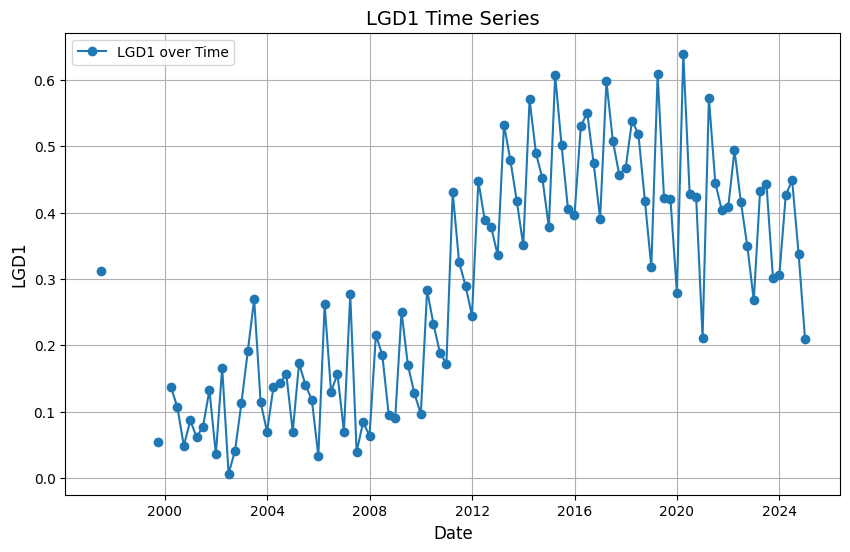

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(data['DATUM'], data['LGD1'], label='LGD1 over Time', marker='o')

plt.title('LGD1 Time Series', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('LGD1', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


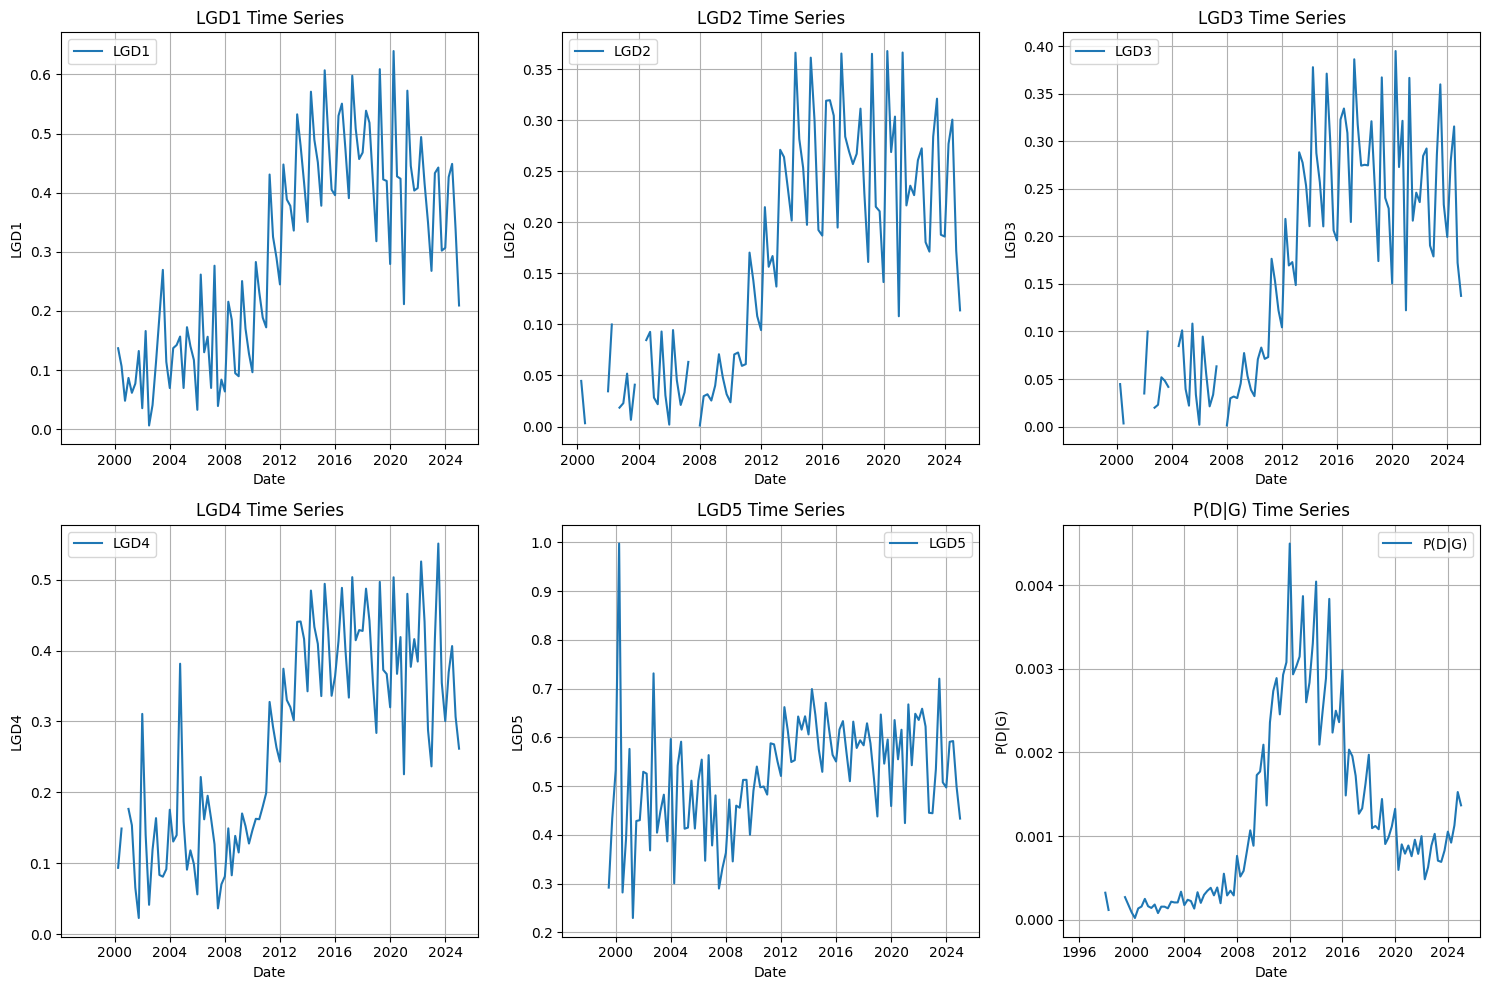

In [4]:
lgd_columns = ['LGD1', 'LGD2', 'LGD3', 'LGD4', 'LGD5', 'P(D|G)']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  

for i, column in enumerate(lgd_columns):
    axes[i].plot(data['DATUM'], data[column], label=column)
    axes[i].set_title(f'{column} Time Series', fontsize=12)
    axes[i].set_xlabel('Date', fontsize=10)
    axes[i].set_ylabel(column, fontsize=10)
    axes[i].legend()
    axes[i].grid(True)

for j in range(len(lgd_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


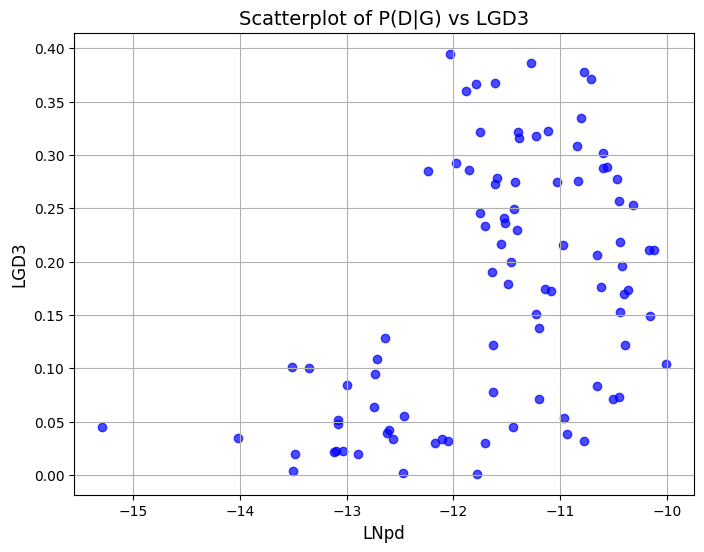

In [5]:
x_column = 'LNpd'  
y_column = 'LGD3'    


plt.figure(figsize=(8, 6))
plt.scatter(data[x_column], data[y_column], alpha=0.7, color='blue')
plt.title('Scatterplot of P(D|G) vs LGD3', fontsize=14)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.grid(True)
plt.show()

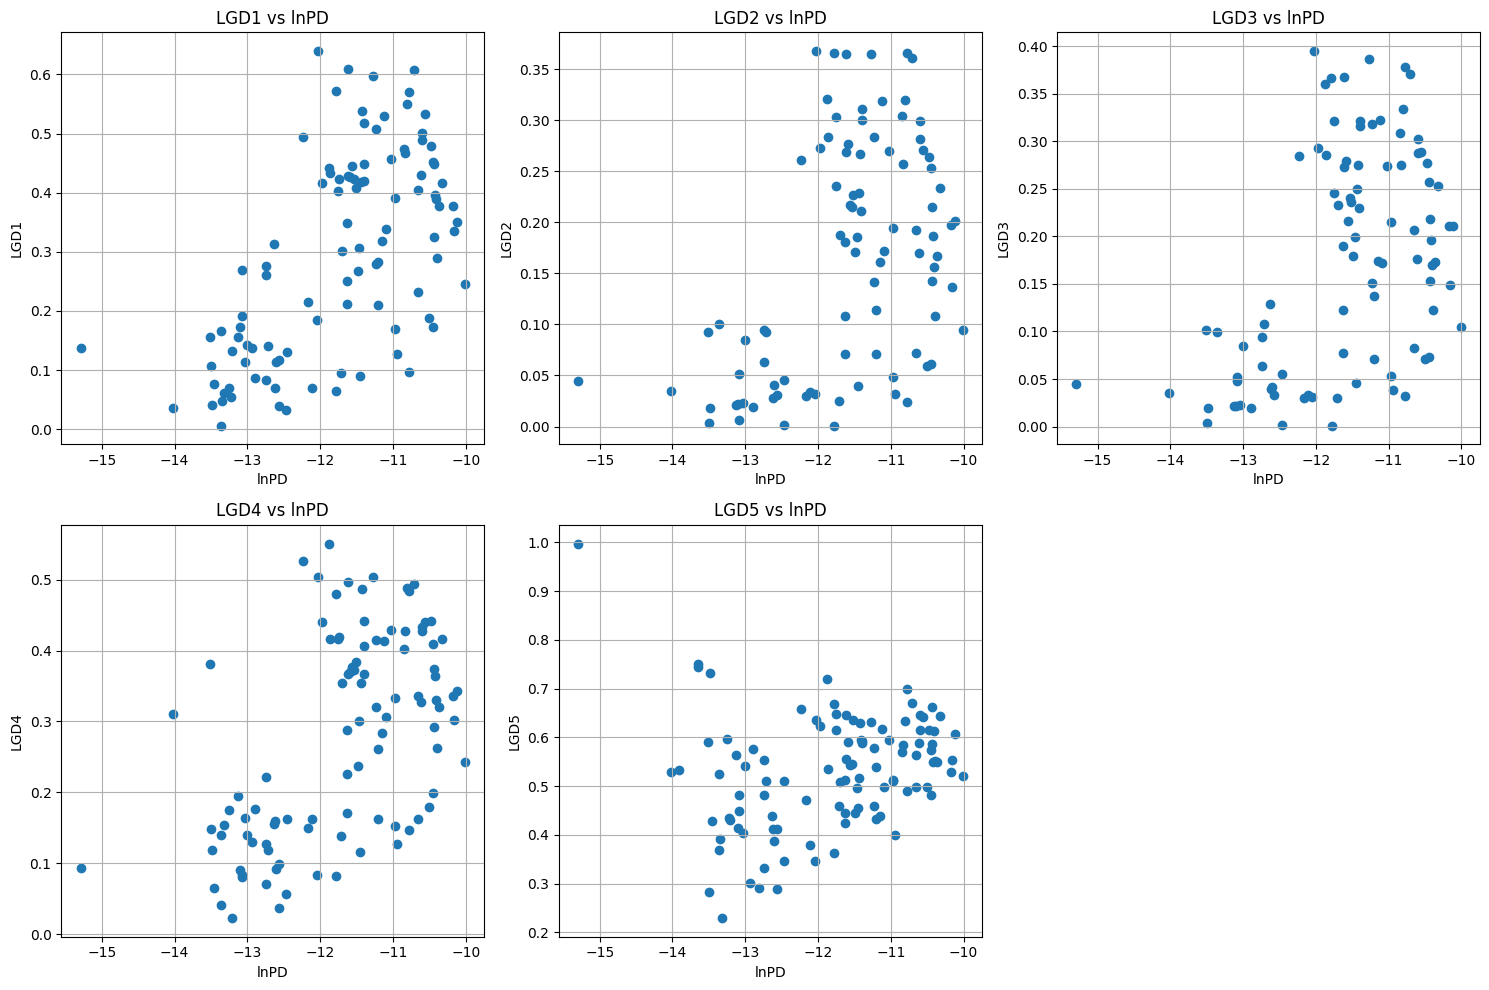

In [6]:
lgd_columns = ['LGD1', 'LGD2', 'LGD3', 'LGD4', 'LGD5']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  

for i, column in enumerate(lgd_columns):
    axes[i].scatter(data['LNpd'], data[column], label=column)
    axes[i].set_title(f'{column} vs lnPD', fontsize=12)
    axes[i].set_xlabel('lnPD', fontsize=10)
    axes[i].set_ylabel(column, fontsize=10)
    axes[i].grid(True)

for j in range(len(lgd_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

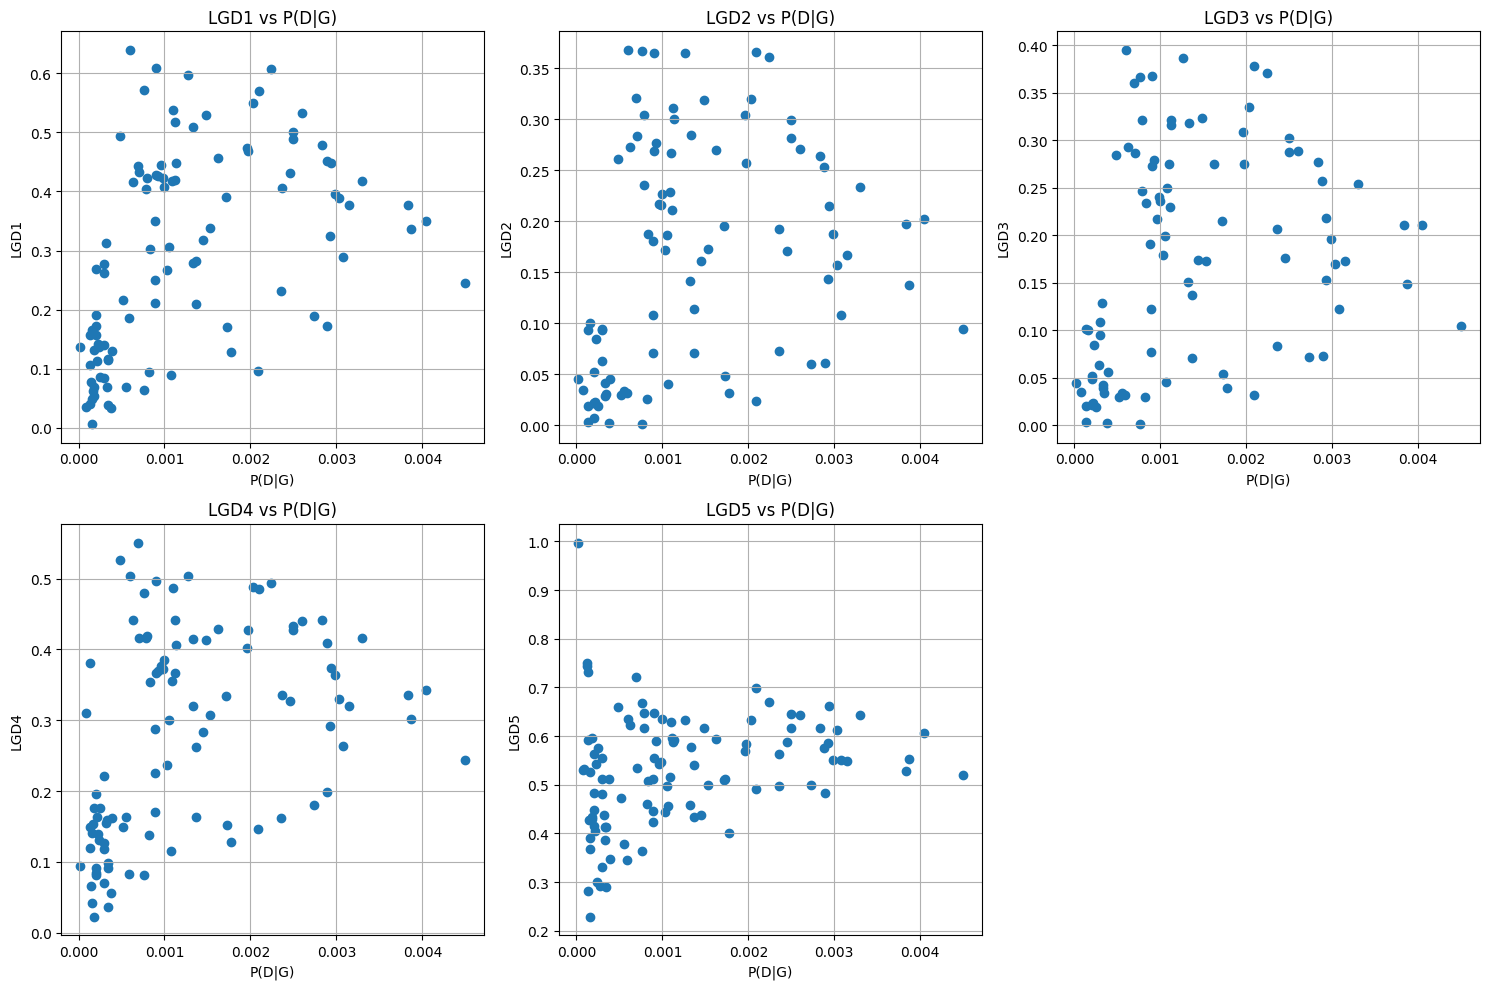

In [7]:
lgd_columns = ['LGD1', 'LGD2', 'LGD3', 'LGD4', 'LGD5']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  

for i, column in enumerate(lgd_columns):
    axes[i].scatter(data['P(D|G)'], data[column], label=column)
    axes[i].set_title(f'{column} vs P(D|G)', fontsize=12)
    axes[i].set_xlabel('P(D|G)', fontsize=10)
    axes[i].set_ylabel(column, fontsize=10)
    axes[i].grid(True)

for j in range(len(lgd_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Estimating the probability of the states

EM converged after 4 iterations.
Quiet state: mu=0.52, sigma=0.12, pi=0.40
Hectic state: mu=0.53, sigma=0.12, pi=0.60


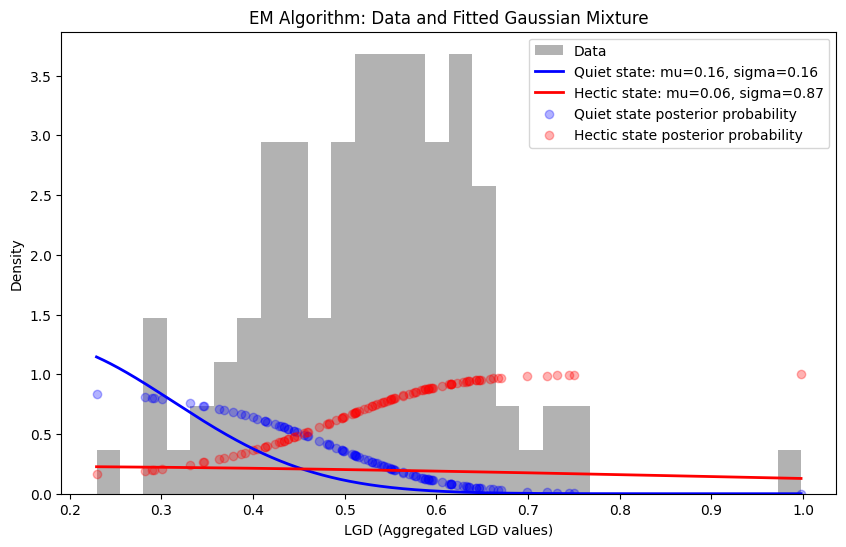

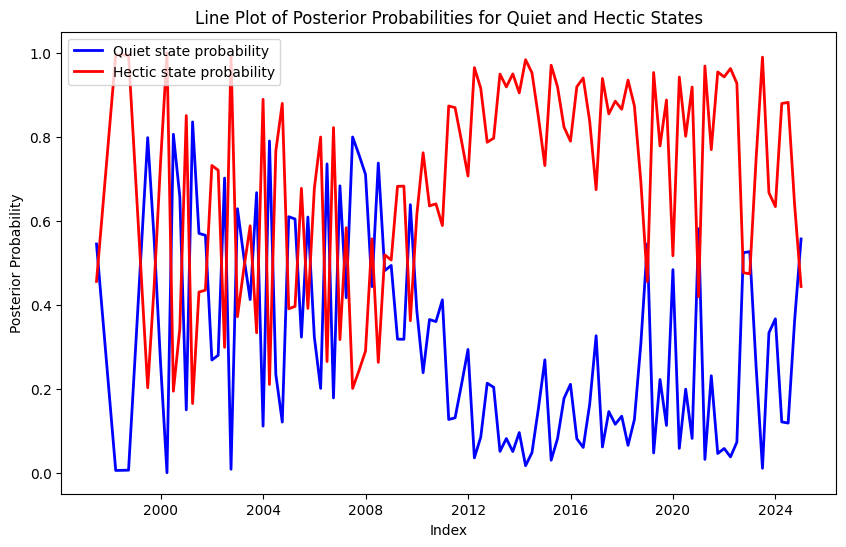

In [8]:

np.random.seed(42)

pi_q, pi_h = 0.5, 0.5  # Kezdeti valószínűségek
mu_q, sigma_q = np.random.rand(2)  # Quiet állapot kezdő paraméterei
mu_h, sigma_h = np.random.rand(2)  # Hectic állapot kezdő paraméterei
tol = 1e-4  # Konvergencia tolerancia
max_iter = 100

LGD = 'LGD5'
data_EM = data.dropna(subset=[LGD, "LNpd"])
X = data_EM[LGD].values  
P_D_G = data_EM["LNpd"].values 

N = len(X)

for iteration in range(max_iter):
    gamma_q = pi_q * norm.pdf(X, loc=mu_q, scale=sigma_q)
    gamma_h = pi_h * norm.pdf(X, loc=mu_h, scale=sigma_h)
    gamma_sum = gamma_q + gamma_h

    gamma_q /= gamma_sum  # Quiet állapot súlyai
    gamma_h /= gamma_sum  # Hectic állapot súlyai


    pi_q = np.mean(gamma_q)
    pi_h = np.mean(gamma_h)

    mu_q = np.sum(gamma_q * X) / np.sum(gamma_q)
    sigma_q = np.sqrt(np.sum(gamma_q * (X - mu_q) ** 2) / np.sum(gamma_q))

    mu_h = np.sum(gamma_h * X) / np.sum(gamma_h)
    sigma_h = np.sqrt(np.sum(gamma_h * (X - mu_h) ** 2) / np.sum(gamma_h))

    if iteration > 0 and abs(mu_q - prev_mu_q) < tol and abs(mu_h - prev_mu_h) < tol:
        break
    prev_mu_q, prev_mu_h = mu_q, mu_h

print("EM converged after {} iterations.".format(iteration))
print(f"Quiet state: mu={mu_q:.2f}, sigma={sigma_q:.2f}, pi={pi_q:.2f}")
print(f"Hectic state: mu={mu_h:.2f}, sigma={sigma_h:.2f}, pi={pi_h:.2f}")


X = data_EM[LGD].values  # Aggregált LGD értékek
mu_q, sigma_q = np.random.rand(2)  # Quiet állapot kezdő paraméterei
mu_h, sigma_h = np.random.rand(2)  # Hectic állapot kezdő paraméterei
pi_q, pi_h = 0.5, 0.5  # Kezdeti valószínűségek
gamma_q = pi_q * norm.pdf(X, loc=mu_q, scale=sigma_q)
gamma_h = pi_h * norm.pdf(X, loc=mu_h, scale=sigma_h)
gamma_sum = gamma_q + gamma_h

gamma_q /= gamma_sum  # Quiet állapot súlyai
gamma_h /= gamma_sum  # Hectic állapot súlyai


plt.figure(figsize=(10, 6))
plt.hist(X, bins=30, density=True, alpha=0.6, color='gray', label='Data')

x_vals = np.linspace(min(X), max(X), 1000)
quiet_pdf = pi_q * norm.pdf(x_vals, loc=mu_q, scale=sigma_q)
hectic_pdf = pi_h * norm.pdf(x_vals, loc=mu_h, scale=sigma_h)

plt.plot(x_vals, quiet_pdf, label=f"Quiet state: mu={mu_q:.2f}, sigma={sigma_q:.2f}", color='blue', linewidth=2)
plt.plot(x_vals, hectic_pdf, label=f"Hectic state: mu={mu_h:.2f}, sigma={sigma_h:.2f}", color='red', linewidth=2)

plt.scatter(X, gamma_q, c='blue', alpha=0.3, label='Quiet state posterior probability')
plt.scatter(X, gamma_h, c='red', alpha=0.3, label='Hectic state posterior probability')

# Title and labels
plt.title("EM Algorithm: Data and Fitted Gaussian Mixture")
plt.xlabel("LGD (Aggregated LGD values)")
plt.ylabel("Density")
plt.legend()

# Show plot
plt.show()
results_df = pd.DataFrame({ 
    LGD: X,
    'Quiet_Posterior': gamma_q,
    'Hectic_Posterior': gamma_h
})

results_df = pd.merge(results_df, data_EM[[LGD, 'DATUM']], on = LGD, how = 'left')
plt.figure(figsize=(10, 6))

# Plot Quiet state posterior probabilities
plt.plot(results_df.DATUM, results_df['Quiet_Posterior'], label='Quiet state probability', color='blue', linewidth=2)

# Plot Hectic state posterior probabilities
plt.plot(results_df.DATUM, results_df['Hectic_Posterior'], label='Hectic state probability', color='red', linewidth=2)

# Title and labels
plt.title("Line Plot of Posterior Probabilities for Quiet and Hectic States")
plt.xlabel("Index")
plt.ylabel("Posterior Probability")
plt.legend()

# Show the plot
plt.show()
results_df['DATUM'] = results_df['DATUM'].apply(convert_to_quarterly)

In [9]:
probabilities = pd.DataFrame()
probabilities['DATUM'] = results_df['DATUM'] 
probabilities['Q_1'] = results_df['Quiet_Posterior']  
probabilities['H_1'] = results_df['Hectic_Posterior'] 
probabilities_df = pd.DataFrame(probabilities)
probabilities_df['DATUM'] = probabilities_df['DATUM'].apply(convert_to_quarterly)

C:\Users\beben\AppData\Local\Temp\ipykernel_8480\2911780200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ffill(inplace=True)


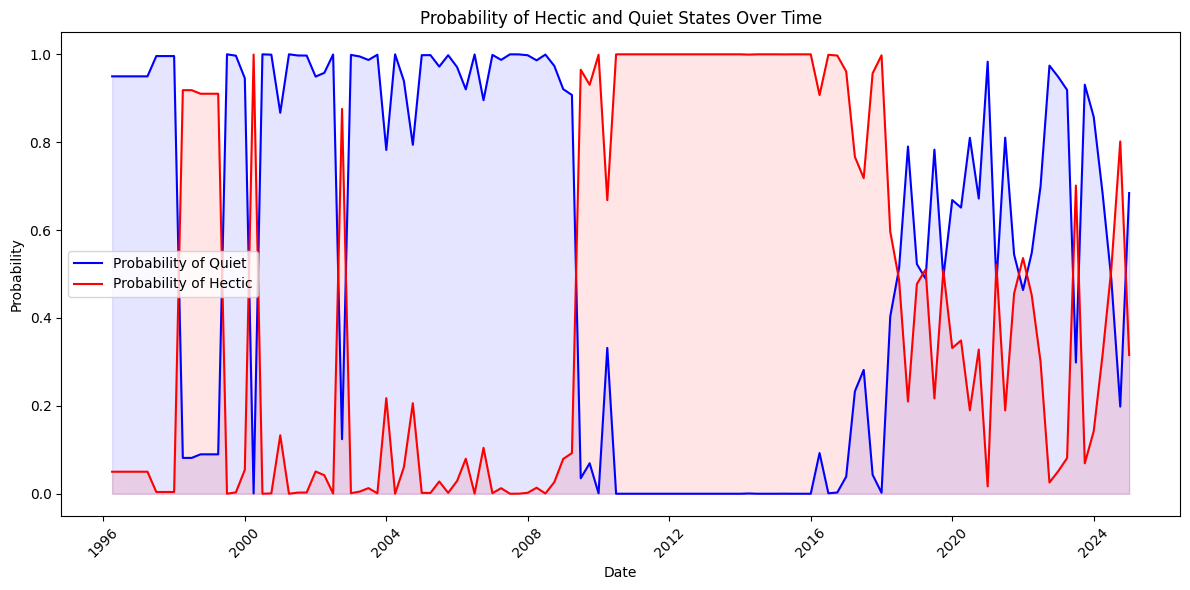

In [37]:
df = data[['DATUM', 'LGD5', 'P(D|G)']]
df.ffill(inplace=True)

date_column = df['DATUM']
data_columns = df.drop(columns=['DATUM'])

# Check for any remaining NaN values and handle them using an imputer
imputer = SimpleImputer(strategy='mean')
data_columns = pd.DataFrame(imputer.fit_transform(data_columns), columns=data_columns.columns, index=data_columns.index)

# Scale the data columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_columns)

n_components = 2  # We want to identify 2 hidden states (hectic and quiet)
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)

# Fit the GMM model
gmm.fit(scaled_data)

# Predict the probabilities for each sample
probabilities = gmm.predict_proba(scaled_data)

# Convert the results into a DataFrame
prob_df = pd.DataFrame(probabilities, columns=['Prob_Quiet', 'Prob_Hectic'], index=df.index)

# Add the original data and date column to the DataFrame
result_df = pd.concat([date_column, data_columns, prob_df], axis=1)

# Plot the probabilities over time
plt.figure(figsize=(12, 6))
plt.plot(result_df['DATUM'], result_df['Prob_Quiet'], label='Probability of Quiet', color='blue')
plt.plot(result_df['DATUM'], result_df['Prob_Hectic'], label='Probability of Hectic', color='red')
plt.fill_between(result_df['DATUM'], 0, result_df['Prob_Quiet'], color='blue', alpha=0.1)
plt.fill_between(result_df['DATUM'], 0, result_df['Prob_Hectic'], color='red', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Probability')
plt.title('Probability of Hectic and Quiet States Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
result_df['DATUM'] = result_df['DATUM'].apply(convert_to_quarterly)
result_df = result_df[['DATUM', 'Prob_Quiet', 'Prob_Hectic']]
merged_df = pd.merge(result_df, probabilities_df, on='DATUM', how='outer')
merged_df.rename(columns={
    'Prob_Quiet': 'Q_2', 
    'Prob_Hectic': 'H_2'
}, inplace=True)


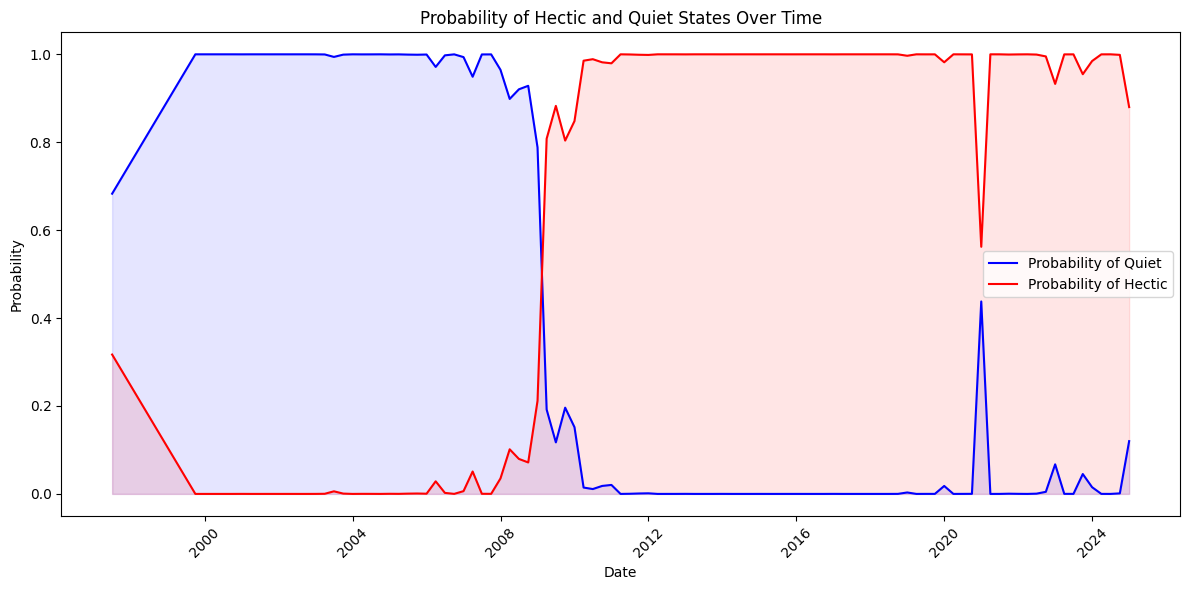

,DATUM,LGD1,LNpd,Prob_Quiet,Prob_Hectic
5,1997-06-30,0.312566,-12.637365,0.682952,3.170484e-01
14,1999-09-30,0.054471,-13.220123,0.999996,3.951013e-06
16,2000-03-31,0.136821,-15.292399,1.000000,1.636338e-12
17,2000-06-30,0.106402,-13.500639,0.999998,1.527114e-06
18,2000-09-30,0.048024,-13.346488,0.999999,1.424917e-06
...,...,...,...,...,...
111,2023-12-31,0.306554,-11.459891,0.015276,9.847240e-01
112,2024-03-31,0.426458,-11.593001,0.000083,9.999172e-01
113,2024-06-30,0.448654,-11.390762,0.000013,9.999873e-01
114,2024-09-30,0.337895,-11.089090,0.001226,9.987742e-01


In [41]:
df = data[['DATUM', 'LGD1', 'LNpd']]
df = df.dropna()

date_column = df['DATUM']
data_columns = df.drop(columns=['DATUM'])

# Scale the data columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_columns)

n_components = 2
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(scaled_data)
probabilities = gmm.predict_proba(scaled_data)

prob_df = pd.DataFrame(probabilities, columns=['Prob_Quiet', 'Prob_Hectic'], index=df.index)
result_df = pd.concat([date_column, data_columns, prob_df], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(result_df['DATUM'], result_df['Prob_Quiet'], label='Probability of Quiet', color='blue')
plt.plot(result_df['DATUM'], result_df['Prob_Hectic'], label='Probability of Hectic', color='red')
plt.fill_between(result_df['DATUM'], 0, result_df['Prob_Quiet'], color='blue', alpha=0.1)
plt.fill_between(result_df['DATUM'], 0, result_df['Prob_Hectic'], color='red', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Probability')
plt.title('Probability of Hectic and Quiet States Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

result_df

In [13]:
result_df['DATUM'] = result_df['DATUM'].apply(convert_to_quarterly)
result_df = result_df[['DATUM', 'Prob_Quiet', 'Prob_Hectic']]
merged_df = pd.merge(result_df, merged_df, on='DATUM', how='outer')
merged_df.rename(columns={
    'Prob_Quiet': 'Q_3', 
    'Prob_Hectic': 'H_3'
}, inplace=True)

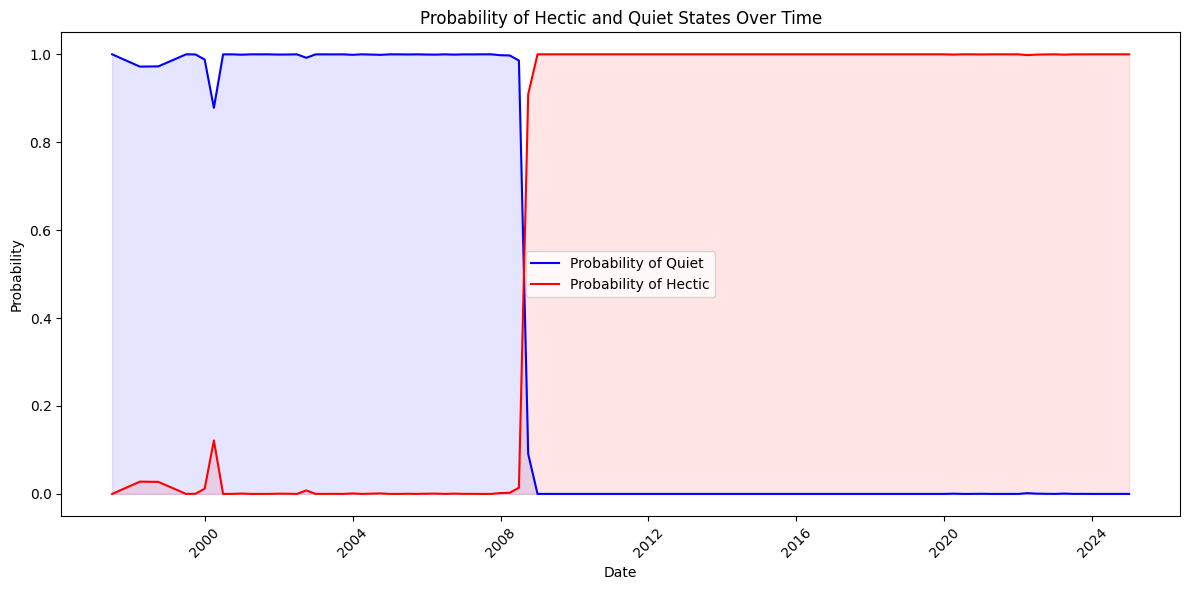

In [14]:
from hmmlearn import hmm
df = data[['DATUM', 'LGD5', 'P(D|G)']]

df = df.dropna()
date_column = df['DATUM']
data_columns = df.drop(columns=['DATUM'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_columns)
n_components = 2  
model = hmm.GaussianHMM(n_components=n_components, covariance_type='full', random_state=42)
model.fit(scaled_data)
hidden_states = model.predict(scaled_data)
probabilities = model.predict_proba(scaled_data)
prob_df = pd.DataFrame(probabilities, columns=[ 'Prob_Hectic', 'Prob_Quiet'], index=df.index)
result_df = pd.concat([date_column, data_columns, prob_df], axis=1)
result_df['Hidden_State'] = hidden_states


plt.figure(figsize=(12, 6))
plt.plot(result_df['DATUM'], result_df['Prob_Quiet'], label='Probability of Quiet', color='blue')
plt.plot(result_df['DATUM'], result_df['Prob_Hectic'], label='Probability of Hectic', color='red')
plt.fill_between(result_df['DATUM'], 0, result_df['Prob_Quiet'], color='blue', alpha=0.1)
plt.fill_between(result_df['DATUM'], 0, result_df['Prob_Hectic'], color='red', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Probability')
plt.title('Probability of Hectic and Quiet States Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
result_df['DATUM'] = result_df['DATUM'].apply(convert_to_quarterly)
result_df = result_df[['DATUM', 'Prob_Quiet', 'Prob_Hectic']]
merged_df = pd.merge(result_df, merged_df, on='DATUM', how='outer')
merged_df.rename(columns={
    'Prob_Quiet': 'Q_4', 
    'Prob_Hectic': 'H_4'
}, inplace=True)

#  GDP

In [18]:
gdp = pd.read_excel('.\\adatok.xlsx', sheet_name='GDPfolyo')
gdp

,DATUM,GDP all,valtozas,hectic_m
0,1995Q1,1262264,NaN,NaN
1,1995Q2,1439498,NaN,NaN
2,1995Q3,1468111,NaN,NaN
3,1995Q4,1685712,NaN,NaN
4,1996Q1,1614133,0.245891,0.0
...,...,...,...,...
114,2023Q3,19578112,0.130630,0.0
115,2023Q4,21156118,0.112211,0.0
116,2024Q1,17331191,0.099912,0.0
117,2024Q2,20471317,0.092156,0.0


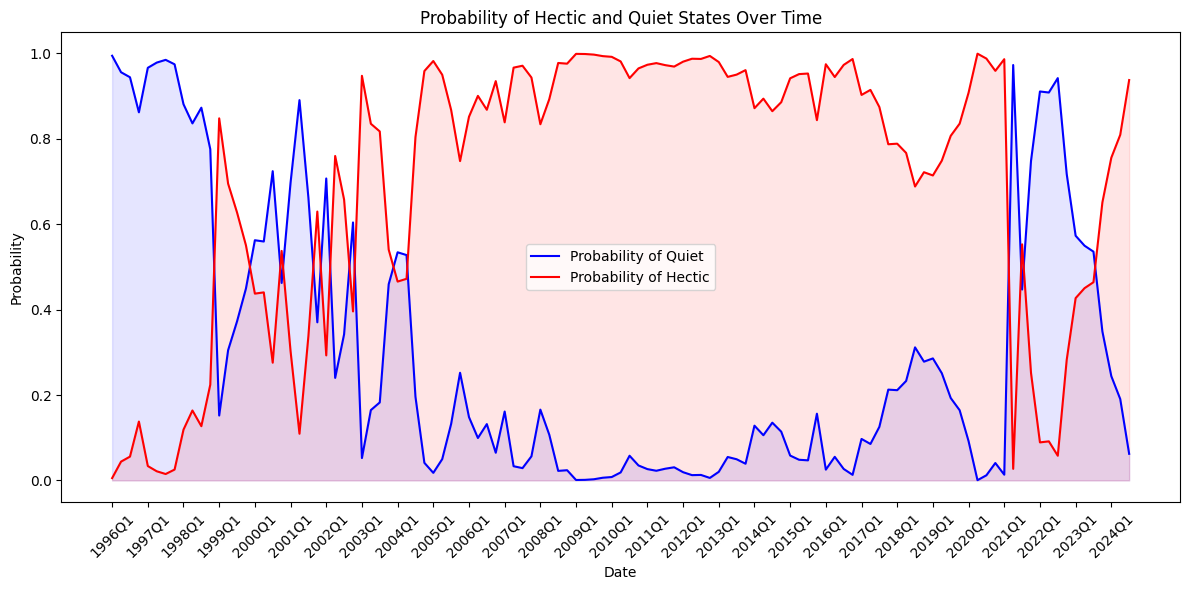

In [19]:
df = gdp[['DATUM', 'valtozas']]
df = df.dropna()
date_column = df['DATUM']
data_columns = df.drop(columns=['DATUM'])

imputer = SimpleImputer(strategy='mean')
data_columns = pd.DataFrame(imputer.fit_transform(data_columns), columns=data_columns.columns, index=data_columns.index)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_columns)

n_components = 2  
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)

gmm.fit(scaled_data)

probabilities = gmm.predict_proba(scaled_data)

prob_df = pd.DataFrame(probabilities, columns=['Prob_Hectic', 'Prob_Quiet'], index=df.index)

result_df = pd.concat([date_column, data_columns, prob_df], axis=1)


plt.figure(figsize=(12, 6))
plt.plot(result_df['DATUM'], result_df['Prob_Quiet'], label='Probability of Quiet', color='blue')
plt.plot(result_df['DATUM'], result_df['Prob_Hectic'], label='Probability of Hectic', color='red')
plt.fill_between(result_df['DATUM'], 0, result_df['Prob_Quiet'], color='blue', alpha=0.1)
plt.fill_between(result_df['DATUM'], 0, result_df['Prob_Hectic'], color='red', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Probability')
plt.title('Probability of Hectic and Quiet States Over Time')
plt.legend()
xticks = date_column[::4]
plt.xticks(xticks, rotation=45)
plt.tight_layout()
plt.show()



result_df = result_df[['DATUM', 'Prob_Quiet', 'Prob_Hectic']]
merged_df = pd.merge(result_df, merged_df, on='DATUM', how='outer')
merged_df.rename(columns={
    'Prob_Quiet': 'Q_6', 
    'Prob_Hectic': 'H_6'
}, inplace=True)

## Determining the states for each time

In [20]:
aggregated_data = merged_df.groupby('DATUM').mean(numeric_only=True).reset_index()
#aggregated_data.to_excel('Aggregated_probabilities.xlsx', index=False)
aggregated_data

,DATUM,Q_6,H_6,Q_5,H_5,Q_4,H_4,Q_3,H_3,Q_2,H_2,Q_1,H_1
0,1996Q1,0.994596,0.005404,NaN,NaN,NaN,NaN,NaN,NaN,0.949872,0.050128,NaN,NaN
1,1996Q2,0.955955,0.044045,0.920753,0.079247,NaN,NaN,NaN,NaN,0.949872,0.050128,NaN,NaN
2,1996Q3,0.944260,0.055740,0.825027,0.174973,NaN,NaN,NaN,NaN,0.949872,0.050128,NaN,NaN
3,1996Q4,0.862118,0.137882,0.913471,0.086529,NaN,NaN,NaN,NaN,0.949872,0.050128,NaN,NaN
4,1997Q1,0.966325,0.033675,0.856496,0.143504,NaN,NaN,NaN,NaN,0.949872,0.050128,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2023Q4,0.348885,0.651115,0.909991,0.090009,5.929973e-07,0.999999,0.370390,0.629610,0.857717,0.142283,0.366354,0.633646
112,2024Q1,0.244214,0.755786,0.457984,0.542016,2.141765e-06,0.999998,0.076090,0.923910,0.684815,0.315185,0.120977,0.879023
113,2024Q2,0.190633,0.809367,0.907228,0.092772,4.705894e-09,1.000000,0.047323,0.952677,0.487541,0.512459,0.118214,0.881786
114,2024Q3,0.062297,0.937703,0.918254,0.081746,9.197642e-15,1.000000,0.139297,0.860703,0.198326,0.801674,0.361678,0.638322


In [21]:
final_result_df = pd.DataFrame()
final_result_df['DATUM'] = aggregated_data['DATUM']
final_result_df['Mean_Quiet'] = aggregated_data[['Q_2', 'Q_3', 'Q_6']].mean(axis=1) #6osat meg lehet hozza
final_result_df['Mean_Hectic'] = aggregated_data[['H_2', 'H_3', 'H_6']].mean(axis=1)
final_result_df['Quiet_Assignment'] = final_result_df['Mean_Quiet'].apply(lambda x: 0 if x < 0.5 else 1)
final_result_df['Hectic_Assignment'] = final_result_df['Mean_Hectic'].apply(lambda x: 1 if x > 0.5 else 0)
final_result_df['Q_2'] = aggregated_data['Q_2']
final_result_df['H_2'] = aggregated_data['H_2']
final_result_df['Quiet_2'] = final_result_df['Q_2'].apply(lambda x: 0 if x < 0.5 else 1)
final_result_df['Hectic_2'] = final_result_df['H_2'].apply(lambda x: 1 if x > 0.5 else 0)

final_result_df.to_excel('States.xlsx', index=False)
final_result_df

,DATUM,Mean_Quiet,Mean_Hectic,Quiet_Assignment,Hectic_Assignment,Q_2,H_2,Quiet_2,Hectic_2
0,1996Q1,0.972234,0.027766,1,0,0.949872,0.050128,1,0
1,1996Q2,0.952914,0.047086,1,0,0.949872,0.050128,1,0
2,1996Q3,0.947066,0.052934,1,0,0.949872,0.050128,1,0
3,1996Q4,0.905995,0.094005,1,0,0.949872,0.050128,1,0
4,1997Q1,0.958098,0.041902,1,0,0.949872,0.050128,1,0
...,...,...,...,...,...,...,...,...,...
111,2023Q4,0.525664,0.474336,1,0,0.857717,0.142283,1,0
112,2024Q1,0.335040,0.664960,0,1,0.684815,0.315185,1,0
113,2024Q2,0.241832,0.758168,0,1,0.487541,0.512459,0,1
114,2024Q3,0.133307,0.866693,0,1,0.198326,0.801674,0,1


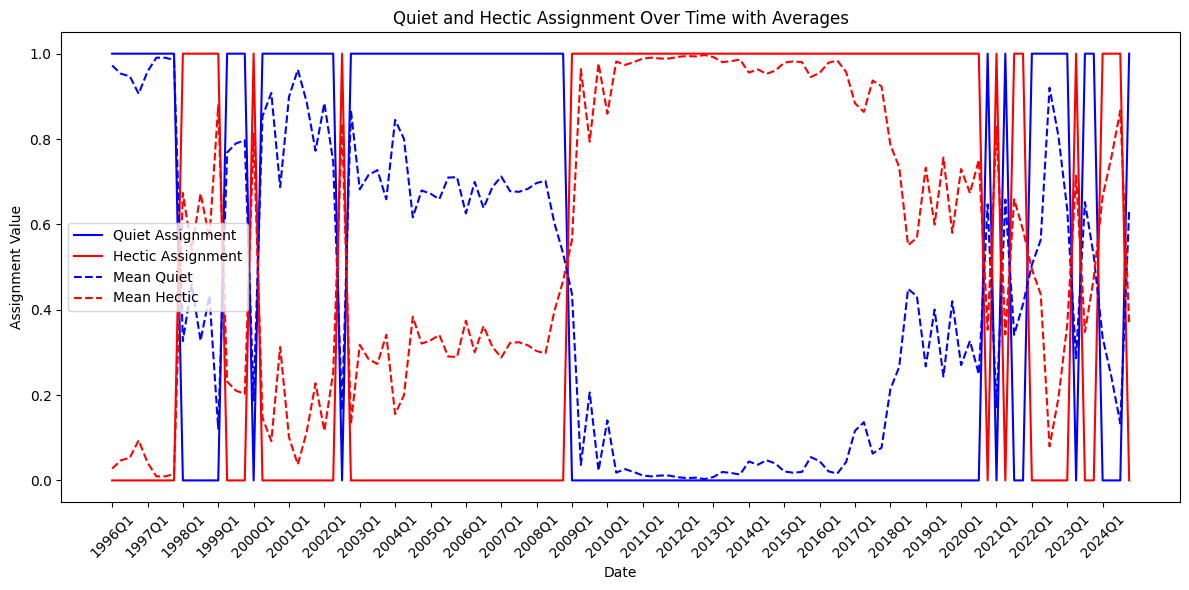

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(final_result_df['DATUM'], final_result_df['Quiet_Assignment'], label='Quiet Assignment', color='blue')
plt.plot(final_result_df['DATUM'], final_result_df['Hectic_Assignment'], label='Hectic Assignment', color='red')
plt.plot(final_result_df['DATUM'], final_result_df['Mean_Quiet'], color='blue', linestyle='--', label='Mean Quiet')
plt.plot(final_result_df['DATUM'], final_result_df['Mean_Hectic'], color='red', linestyle='--', label='Mean Hectic')
plt.xlabel('Date')
plt.ylabel('Assignment Value')
plt.title('Quiet and Hectic Assignment Over Time with Averages')
plt.legend()

xticks = final_result_df['DATUM'][::4]  
plt.xticks(xticks, rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


# Estimating GDP distribution

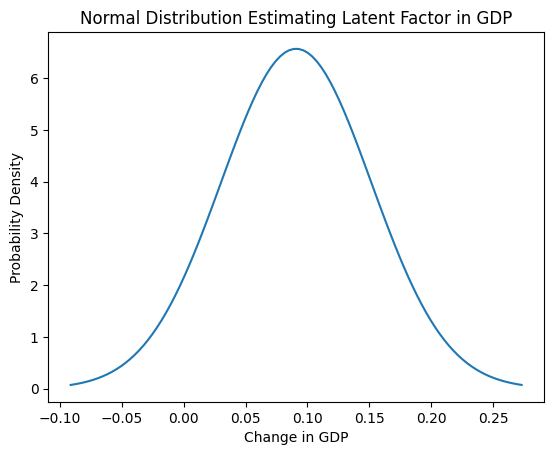

Mean: 0.09091380589777864, Standard Deviation: 0.06073935449197835


In [23]:
df = gdp[['DATUM', 'valtozas']]
df = df.dropna()
gdp_changes = df['valtozas']

mean = gdp_changes.mean()
std_dev = gdp_changes.std()

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution
plt.plot(x, y)
plt.title('Normal Distribution Estimating Latent Factor in GDP')
plt.xlabel('Change in GDP')
plt.ylabel('Probability Density')
plt.show()

print(f"Mean: {mean}, Standard Deviation: {std_dev}")

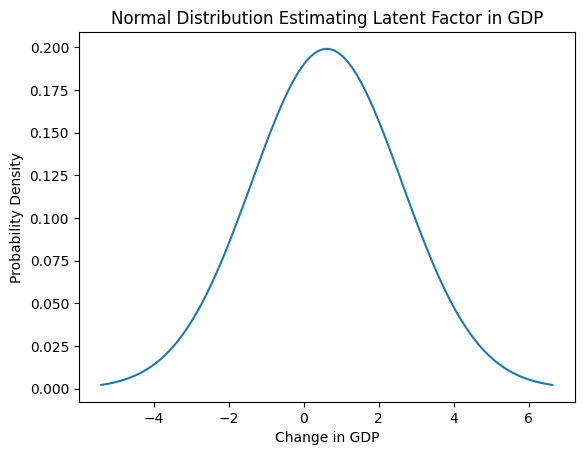

Mean: 0.6147826086956522, Standard Deviation: 2.0027281164618476


In [24]:
GDP = pd.read_excel('.\\adatok.xlsx', sheet_name='GDP')
df = GDP[['DATUM', 'Valtozas']]
df = df.dropna()
GDP_changes = df['Valtozas']
mean = GDP_changes.mean()
std_dev = GDP_changes.std()

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

y = norm.pdf(x, mean, std_dev)

plt.plot(x, y)
plt.title('Normal Distribution Estimating Latent Factor in GDP')
plt.xlabel('Change in GDP')
plt.ylabel('Probability Density')
plt.show()

print(f"Mean: {mean}, Standard Deviation: {std_dev}")

In [25]:

final_result_df

,DATUM,Mean_Quiet,Mean_Hectic,Quiet_Assignment,Hectic_Assignment,Q_2,H_2,Quiet_2,Hectic_2
0,1996Q1,0.972234,0.027766,1,0,0.949872,0.050128,1,0
1,1996Q2,0.952914,0.047086,1,0,0.949872,0.050128,1,0
2,1996Q3,0.947066,0.052934,1,0,0.949872,0.050128,1,0
3,1996Q4,0.905995,0.094005,1,0,0.949872,0.050128,1,0
4,1997Q1,0.958098,0.041902,1,0,0.949872,0.050128,1,0
...,...,...,...,...,...,...,...,...,...
111,2023Q4,0.525664,0.474336,1,0,0.857717,0.142283,1,0
112,2024Q1,0.335040,0.664960,0,1,0.684815,0.315185,1,0
113,2024Q2,0.241832,0.758168,0,1,0.487541,0.512459,0,1
114,2024Q3,0.133307,0.866693,0,1,0.198326,0.801674,0,1
